# Assignment 5

In this assignment, you'll scrape text from [The California Aggie](https://theaggie.org/) and then analyze the text.

The Aggie is organized by category into article lists. For example, there's a [Campus News](https://theaggie.org/campus/) list, [Arts & Culture](https://theaggie.org/arts/) list, and [Sports](https://theaggie.org/sports/) list. Notice that each list has multiple pages, with a maximum of 15 articles per page.

The goal of exercises 1.1 - 1.3 is to scrape articles from the Aggie for analysis in exercise 1.4.

__Exercise 1.1.__ Write a function that extracts all of the links to articles in an Aggie article list. The function should:

* Have a parameter `url` for the URL of the article list.

* Have a parameter `page` for the number of pages to fetch links from. The default should be `1`.

* Return a list of aricle URLs (each URL should be a string).

Test your function on 2-3 different categories to make sure it works.

Hints:

* Be polite to The Aggie and save time by setting up [requests_cache](https://pypi.python.org/pypi/requests-cache) before you write your function.

* Start by getting your function to work for just 1 page. Once that works, have your function call itself to get additional pages.

* You can use [lxml.html](http://lxml.de/lxmlhtml.html) or [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) to scrape HTML. Choose one and use it throughout the entire assignment.

In [2]:
from bs4 import BeautifulSoup
from itertools import chain
from collections import Counter
from nltk.corpus import stopwords
import urllib
from lxml import html
import numpy as np
import requests
import pandas as pd
import nltk
from nltk import corpus
from nltk.stem.porter import PorterStemmer
from matplotlib import pyplot as plt
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
import requests_cache
requests_cache.install_cache('demo_cache')
import math
plt.style.use('ggplot')
result = []
a = []
import itertools
def Find_link(url,num = 1,i = 1):
    """Get the link of each articles
    Args:
        the link and the number of pages
    Returns:
        all the link of articles
    
    
    """
    
    
    
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    for link in soup.find_all("h2",attrs={"class": "entry-title"}):
        a = link.a
        tmp = str(a.get('href'))
        result.append(tmp)
    while i < num:
        i = i+1
        Find_link(url+"page/"+ str(i) +"/",num,i)
    return result

__Exercise 1.2.__ Write a function that extracts the title, text, and author of an Aggie article. The function should:

* Have a parameter `url` for the URL of the article.

* For the author, extract the "Written By" line that appears at the end of most articles. You don't have to extract the author's name from this line.

* Return a dictionary with keys "url", "title", "text", and "author". The values for these should be the article url, title, text, and author, respectively.

For example, for [this article](https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/) your function should return something similar to this:
```
{
    'author': u'Written By: Bianca Antunez \xa0\u2014\xa0city@theaggie.org',
    'text': u'Davis residents create financial model to make city\'s financial state more transparent To increase transparency between the city\'s financial situation and the community, three residents created a model called Project Toto which aims to improve how the city communicates its finances in an easily accessible design. Jeff Miller and Matt Williams, who are members of Davis\' Finance and Budget Commission, joined together with Davis entrepreneur Bob Fung to create the model plan to bring the project to the Finance and Budget Commission in February, according to Kelly Stachowicz, assistant city manager. "City staff appreciate the efforts that have gone into this, and the interest in trying to look at the city\'s potential financial position over the long term," Stachowicz said in an email interview. "We all have a shared goal to plan for a sound fiscal future with few surprises. We believe the Project Toto effort will mesh well with our other efforts as we build the budget for the next fiscal year and beyond." Project Toto complements the city\'s effort to amplify the transparency of city decisions to community members. The aim is to increase the understanding about the city\'s financial situation and make the information more accessible and easier to understand. The project is mostly a tool for public education, but can also make predictions about potential decisions regarding the city\'s financial future. Once completed, the program will allow residents to manipulate variables to see their eventual consequences, such as tax increases or extensions and proposed developments "This really isn\'t a budget, it is a forecast to see the intervention of these decisions," Williams said in an interview with The Davis Enterprise. "What happens if we extend the sales tax? What does it do given the other numbers that are in?" Project Toto enables users, whether it be a curious Davis resident, a concerned community member or a city leader, with the ability to project city finances with differing variables. The online program consists of the 400-page city budget for the 2016-2017 fiscal year, the previous budget, staff reports and consultant analyses. All of the documents are cited and accessible to the public within Project Toto. "It\'s a model that very easily lends itself to visual representation," Mayor Robb Davis said. "You can see the impacts of decisions the council makes on the fiscal health of the city." Complementary to this program, there is also a more advanced version of the model with more in-depth analyses of the city\'s finances. However, for an easy-to-understand, simplistic overview, Project Toto should be enough to help residents comprehend Davis finances. There is still more to do on the project, but its creators are hard at work trying to finalize it before the 2017-2018 fiscal year budget. "It\'s something I have been very much supportive of," Davis said. "Transparency is not just something that I have been supportive of but something we have stated as a city council objective [ ] this fits very well with our attempt to inform the public of our challenges with our fiscal situation." ',
    'title': 'Project Toto aims to address questions regarding city finances',
    'url': 'https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/'
}
```

Hints:

* The author line is always the last line of the last paragraph.

*   Python 2 displays some Unicode characters as `\uXXXX`. For instance, `\u201c` is a left-facing quotation mark.
    You can convert most of these to ASCII characters with the method call (on a string)
    ```
    .translate({ 0x2018:0x27, 0x2019:0x27, 0x201C:0x22, 0x201D:0x22, 0x2026:0x20 })
    ```
    If you're curious about these characters, you can look them up on [this page](http://unicode.org/cldr/utility/character.jsp), or read 
    more about [what Unicode is](http://unicode.org/standard/WhatIsUnicode.html).

In [3]:
import re
def find_content(url_1):
    """Get the dictionary of author, link, text and title 
    Args:
        the link
    Returns:
        The dictionary of the author, link, text and title 
    """
    txt = []
    page_1 = requests.get(url_1).text
    soup_1 = BeautifulSoup(page_1, 'lxml')
    dat = soup_1.find_all("div",attrs={"itemprop": "articleBody"})[0].find_all("p")
    tmp = dat[-1]
    del dat[-1]   
    for link in dat:
        txt.append(link.text.translate({ 0x2018:0x27, 0x2019:0x27, 0x201C:0x22, 0x201D:0x22, 0x2026:0x20 }))
    if "\n" in tmp:
        re = tmp.text.split("\n")
        txt.append((re[0]))
        B = re[1].translate({ 0x2018:0x27, 0x2019:0x27, 0x201C:0x22, 0x201D:0x22, 0x2026:0x20 })
    else:
        B = tmp.text.translate({ 0x2018:0x27, 0x2019:0x27, 0x201C:0x22, 0x201D:0x22, 0x2026:0x20 })
    A = reduce(lambda x,y: x+y,txt)
    C = soup_1.find_all("h1",attrs={"class": "entry-title"})[0].text.translate({ 0x2018:0x27, 0x2019:0x27, 0x201C:0x22, 0x201D:0x22, 0x2026:0x20 })
    E = {'text':A,'url' : url_1,"author":B,"title":C}
    return E

__Exercise 1.3.__ Use your functions from exercises 1.1 and 1.2 to get a data frame of 60 [Campus News](https://theaggie.org/campus/) articles and a data frame of 60 [City News](https://theaggie.org/city/) articles. Add a column to each that indicates the category, then combine them into one big data frame.

The "text" column of this data frame will be your corpus for natural language processing in exercise 1.4.

In [4]:
dat_1 = []
dat_2 = []
result = []
for i in Find_link("https://theaggie.org/campus/",4):
    dat_1.append(find_content(i))
result = []
for j in Find_link("https://theaggie.org/city/",4):
    dat_2.append(find_content(j))

In [8]:
dat_campus = pd.DataFrame(dat_1)
Campus = ["campus"]*60
dat_campus["category"] = Campus
dat_city = pd.DataFrame(dat_2)
City  = ["city"]*60
dat_city["category"] = City
frames = [dat_campus,dat_city]
dattotal = pd.concat(frames)
dattotal

,author,text,title,url,category
0,Written by: Alyssa Vandenberg — campus@theagg...,"Six senators, new executive team electedCurren...",2017 Winter Quarter election results,https://theaggie.org/2017/02/24/2017-winter-qu...,campus
1,Written by: Aaron Liss and Raul Castellanos —...,"Wells Fargo faces fraud, predatory lending cha...","University of California, Davis City Council s...",https://theaggie.org/2017/02/23/university-of-...,campus
2,Written by: Kimia Akbari — campus@theaggie.org,"Faculty, students recount personal tales of im...",Academics unite in peaceful rally against immi...,https://theaggie.org/2017/02/23/academics-unit...,campus
3,Written by: Kenton Goldsby — campus@theaggie.org,Opening date pushed back to May 1Students have...,Memorial Union to reopen Spring Quarter,https://theaggie.org/2017/02/23/memorial-union...,campus
4,Written by: Ivan Valenzuela — campus@theaggie.org,Veto included revision abandoning creation of ...,ASUCD President Alex Lee vetoes amendment for ...,https://theaggie.org/2017/02/23/asucd-presiden...,campus
5,Written by: Alyssa Vandenberg — campus@theagg...,"Shaheen's name to remain on ballot, his votes ...",Senate candidate Zaki Shaheen withdraws from race,https://theaggie.org/2017/02/22/senate-candida...,campus
6,Written by: Aaron Liss — campus@theaggie.org,Students receive email warnings from UC Davis ...,UC Davis experiences several recent hate-based...,https://theaggie.org/2017/02/21/uc-davis-exper...,campus
7,Written by: Alyssa Vandenberg — campus@theagg...,UC Board of Regents to vote on the appointment...,UC President selects Gary May as new UC Davis ...,https://theaggie.org/2017/02/21/uc-president-s...,campus
8,Written by: Jeanna Totah — campus@theaggie.org,Tighter policies require greater approval of o...,Katehi controversy prompts decline of UC admin...,https://theaggie.org/2017/02/20/katehi-controv...,campus
9,Written by: Ivan Valenzuela — campus@theaggie...,SR #7 asks university to increase capacity for...,ASUCD Senate passes resolution submitting comm...,https://theaggie.org/2017/02/20/asucd-senate-p...,campus


__Exercise 1.4.__ Use the Aggie corpus to answer the following questions. Use plots to support your analysis.

* What topics does the Aggie cover the most? Do city articles typically cover different topics than campus articles?

* What are the titles of the top 3 pairs of most similar articles? Examine each pair of articles. What words do they have in common?

* Do you think this corpus is representative of the Aggie? Why or why not? What kinds of inference can this corpus support? Explain your reasoning.

Hints:

*   The [nltk book](http://www.nltk.org/book/) and [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction) may be helpful here.

*   You can determine whether city articles are "near" campus articles from the similarity matrix or with k-nearest neighbors.

*   If you want, you can use the [wordcloud](http://amueller.github.io/word_cloud/) package to plot a word cloud. To install the package, run
    ```
    conda install -c https://conda.anaconda.org/amueller wordcloud
    ```
    in a terminal. Word clouds look nice and are easy to read, but are less precise than bar plots.

In [11]:
#1
tokenize = nltk.word_tokenize
def stem(tokens,stemmer = PorterStemmer().stem):
    """
    Get the words that are tokenize and stemmer
    Input: string
    Output: list of strings (lemmata)
    """
    
    text_word = []
    cachedStopWords = stopwords.words("english")
    cachedStopWords.extend(["also","one",",","go",".","''","``","[","]","S","I","(",")","The","'","It","said","'s","n't","In","like","would","need"])
    for words in tokens:
        if words not in cachedStopWords:
            text_word.append(words)
    return [stemmer(w.lower()) for w in text_word] 

def lemmatize(text):
    """
    Extract simple lemmas based on tokenization and stemming
    Input: string
    Output: list of strings (lemmata)
    """
    return stem(tokenize(text))

In [12]:
def Find_inform(dattotal,length):
    """
    Get the dictionary of the word and all the title of articles that have the word
    Input: dataset, lenghth
    Output: dictionary
    """
    textd = {}
    for i in xrange(length):
        t = dattotal.iloc[i]["text"]
        s = set(lemmatize(t))
        try:
            toks = toks | s
        except NameError:
            toks = s
        for tok in s:
            try:
                textd[tok].append(dattotal.iloc[i]["title"])
            except KeyError:
                textd[tok] = [dattotal.iloc[i]["title"]]
        numd = []
        numd = {key:len(set(val)) for key,val in textd.items()}
        nume = pd.DataFrame.from_dict(numd, orient='index', dtype=None)
        nume = nume.sort_values(by = 0, ascending = False)
    return nume

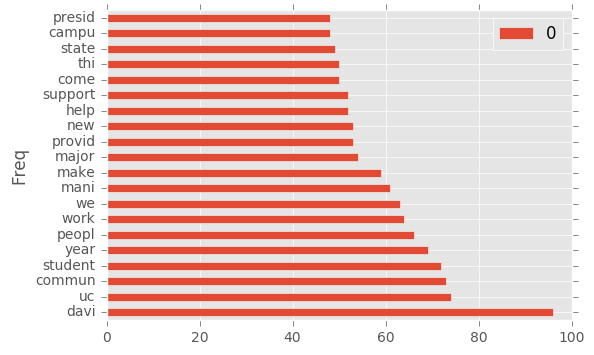

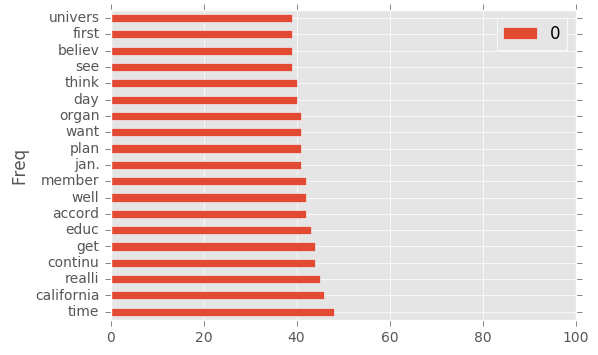

In [13]:
nume = Find_inform(dattotal,120)
dat1 = nume[0:20]
dat2 = nume[21:40]
dat1.plot(y = 0,kind = 'barh')
plt.ylabel("Freq")
plt.xlim(0,100)
plt.show()
dat2.plot(y = 0,kind = 'barh')
plt.ylabel("Freq")
plt.xlim(0,100)
plt.show()

In [14]:
txt_city = []
txt_campus = []
for txt in dat_city["text"]:
    txt_city.append(txt)
for txt in dat_campus["text"]:
    txt_campus.append(txt)
city = u" ".join(txt_city)
campus = u" ".join(txt_campus)
vectorizer = TfidfVectorizer(tokenizer=lemmatize,stop_words="english",smooth_idf=True,norm="l2")
total = [city,campus]
tfs = vectorizer.fit_transform(total)
print tfs.dot(tfs.T)


  (0, 1)	0.638312813728
  (0, 0)	1.0
  (1, 0)	0.638312813728
  (1, 1)	1.0


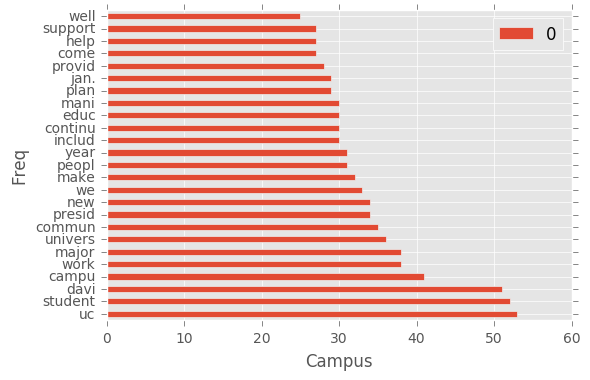

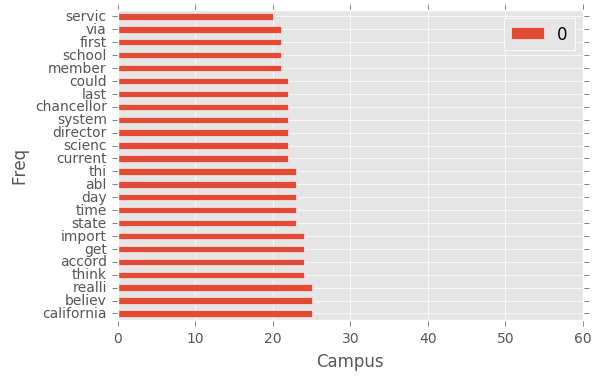

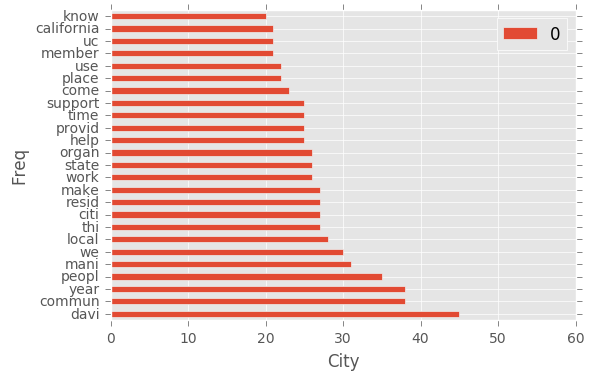

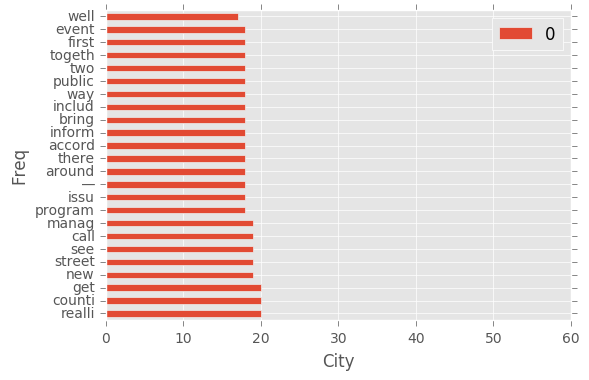

In [15]:
nume_cam = Find_inform(dat_campus,60)
dat1_cam = nume_cam[0:25]
dat2_cam = nume_cam[26:50]
dat1_cam.plot(y = 0,kind = 'barh')
plt.ylabel("Freq")
plt.xlabel('Campus')
plt.show()
dat2_cam.plot(y = 0,kind = 'barh')
plt.ylabel("Freq")
plt.xlim(0,60)
plt.xlabel('Campus')
plt.show()
nume_city = Find_inform(dat_city,60)
dat1_city = nume_city[0:25]
dat2_city = nume_city[26:50]
dat1_city.plot(y = 0,kind = 'barh')
plt.ylabel("Freq")
plt.xlabel('City')
plt.xlim(0,60)
plt.show()
dat2_city.plot(y = 0,kind = 'barh')
plt.ylabel("Freq")
plt.xlim(0,60)
plt.xlabel('City')
plt.show()

After deleteing some irrvelance words from the plot,  we can clearly find out that: In total, The Aggie covers most topic about Major,California, Students, Work, education and community service. 
Moreover, from the similar matrix we find out that the topic of the campus website and the city website are quite the same since the (0,1), (1,0) are quite big. 
After finding the vocabulary of each articles, we find out that both campus and city website mentioned about work, community. However, City mentioned topics about program and resident that haven't mentioned in campus and campus mentioned major and chancellor that did not mentioned in city.

In [17]:
#2
text = txt_campus+txt_city
vectorizer = TfidfVectorizer(tokenizer=lemmatize,stop_words="english",smooth_idf=True,norm="l2")
tfs_text = vectorizer.fit_transform(text)
norm = tfs_text.dot(tfs_text.T)
def Find_min(matrix):
    """
    get the three max index of matrix
    Input:matrix
    Output: three index
    """
    result_sort = []
    sort_matrix = np.argsort(matrix,axis  = None)[::-1]
    for i in sort_matrix:
        if (i/120)!=(i%120):
            result_sort.append(i)
    result_sort_con  = [[result_sort[0]/120,result_sort[0]%120],[result_sort[2]/120,result_sort[2]%120],[result_sort[4]/120,result_sort[4]%120]]
    return result_sort_con

In [18]:

index = Find_min(norm.toarray())
print dattotal["title"].iloc[index[0]]
print dattotal["title"].iloc[index[1]]
print dattotal["title"].iloc[index[2]]



14        UC Davis holds first mental health conference
35    UC Davis to host first ever mental health conf...
Name: title, dtype: object
24    University of California Regents meet, approve...
38     UC Regents vote to raise tuition for UC campuses
Name: title, dtype: object
51            Protests erupt at Milo Yiannopoulos event
58    Davis College Republicans club leads protest a...
Name: title, dtype: object


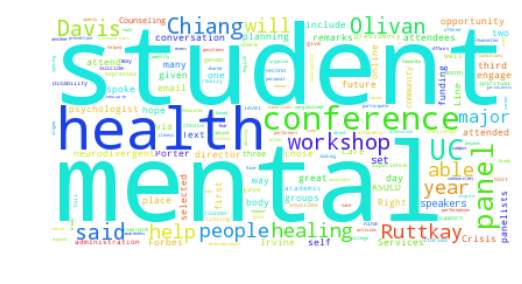

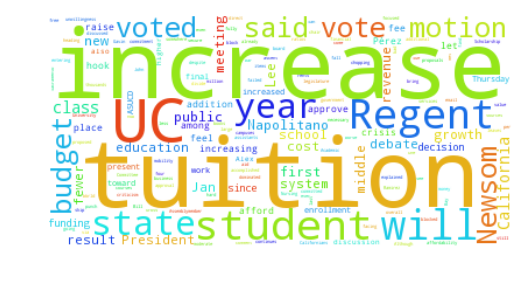

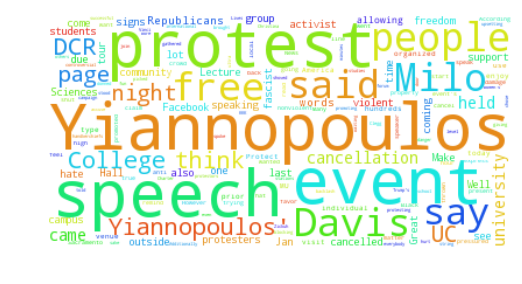

In [19]:
def find_image(txt_1,txt_2):
    """
    Get the word cloud image
    Input: two txts
    Output: The plot
    """
    pair = []
    pair.extend([txt_1,txt_2])
    pair_1 = reduce(lambda x,y: x+y,pair)
    wc = WordCloud(background_color="white", max_words=200)
    wc.generate(pair_1)
    return wc
plt.imshow(find_image(dattotal["text"].iloc[index[0][0]],dattotal["text"].iloc[index[0][1]]))
plt.axis("off")
plt.show()
plt.imshow(find_image(dattotal["text"].iloc[index[1][0]],dattotal["text"].iloc[index[1][1]]))
plt.axis("off")
plt.show()
plt.imshow(find_image(dattotal["text"].iloc[index[2][0]],dattotal["text"].iloc[index[2][1]]))
plt.axis("off")
plt.show()

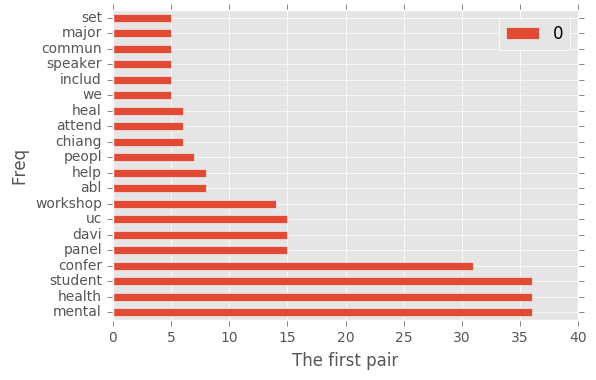

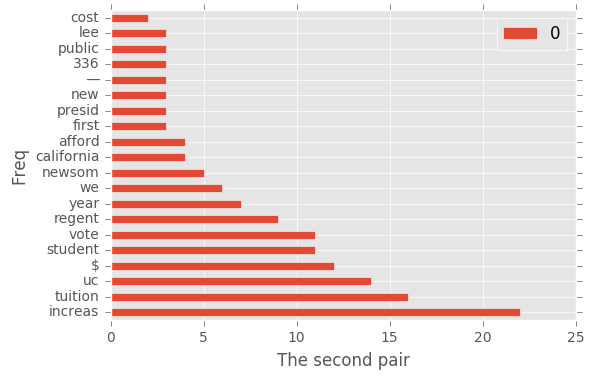

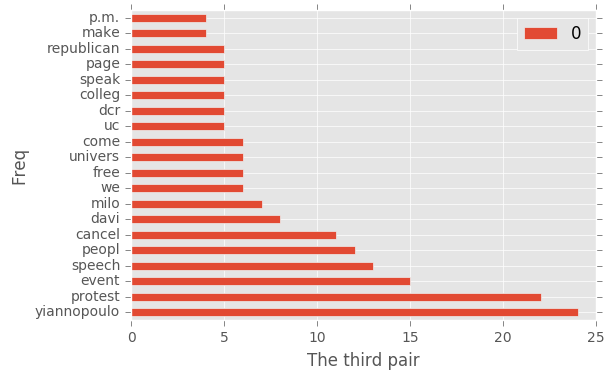

In [20]:
def extract(text_1,text_2):
    """
    Get the dictionary of frequency of the word that appeared in both articles
    Input: two txt file
    Output: dataframe
    """
    dat_ex = Find_inform(pd.DataFrame([text_1,text_2]),2)
    dat_ex = dat_ex[dat_ex[0]==2]
    ex = list(dat_ex.index)
    ex_text = lemmatize(text_1["text"]+text_2["text"])
    ex_dict = dict(Counter(ex_text))
    for i in ex_dict.keys():
        if i not in ex:
            del ex_dict[i]
    dict_dat = pd.DataFrame.from_dict(ex_dict, orient='index', dtype=None) 
    dict_dat = dict_dat.sort_values(by = 0, ascending = False).head(20)
    return dict_dat
    
    
plot_1 = extract(dattotal.iloc[index[0][0]],dattotal.iloc[index[0][1]])
plot_1.plot(y = 0,kind = 'barh')
plt.ylabel("Freq")
plt.xlabel('The first pair')
plt.show()
plot_2 = extract(dattotal.iloc[index[1][0]],dattotal.iloc[index[1][1]])
plot_2.plot(y = 0,kind = 'barh')
plt.ylabel("Freq")
plt.xlabel('The second pair')
plt.show()
plot_3 = extract(dattotal.iloc[index[2][0]],dattotal.iloc[index[2][1]])
plot_3.plot(y = 0,kind = 'barh')
plt.ylabel("Freq")
plt.xlabel('The third pair')
plt.show()

We find out that the three pairs of titles above are the most similar one, so we may assume that words are both likely to appear in each pair of articles.
We find out that the similar words of first pair of two articles are  health, student, mental,conference and workshop.
The similar words of second pair of two articles are increase,tuition,student vote and regent.
The similar words of third pair of articles are protest, speech and Yiannoloulos.

Then we extract the common word from each pair of txt file,find the frequency of each word and get the bar plot. The we find out that be bar-plot quite match the word cloud plot. So we can assume that the common words of each pair of articles are those that have larger size in the word cloud plot.

3

I don't think the corpus represente the Aggie. First of all, there are lots of category in The Aggie except campus and city, such as sports, technology. Moreover, we only get the first four pages of the website, and the website update everyday, so it is impossible for us to get all the information about The Aggie form the corpus. Still, we find out that the author number is limited, so we still can conclude that the corpus cannot represente the Aggie,

This corpus implies that the website often talks about the news of student, UC Davis, education and major. We also find out that the if two articles are similar, these tow articles often discuss the same topic. The corpus also support the idea that the city articles are quite similar to the campus, and they both foucus on the life of the students and some interesting event happened in davis.